# Its On Us meal awards data analysis

data is output into the `output` folder

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_awarded = pd.read_csv('input/awarded.csv')
df_response = pd.read_csv('input/form_responses.csv')


## Two datasets, the responses and the awarded table

In [46]:
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             2278 non-null   object
 1   phone_number          2278 non-null   object
 2   meals                 2278 non-null   int64 
 3   comments              892 non-null    object
 4   community             652 non-null    object
 5   statement_past_month  662 non-null    object
 6   age_group             651 non-null    object
 7   covid_impact          642 non-null    object
dtypes: int64(1), object(7)
memory usage: 142.5+ KB


In [47]:
df_awarded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   phone_number  1000 non-null   object
 1   amount        1000 non-null   int64 
 2   gifted        847 non-null    object
 3   comment       182 non-null    object
 4   date          2 non-null      object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [48]:
df_awarded.dropna(subset=['gifted'])['gifted'].value_counts()

yes    429
Yes    418
Name: gifted, dtype: int64

Let's see the distribution number of of meals and money awarded for a given phone number

Text(0, 0.5, 'Count')

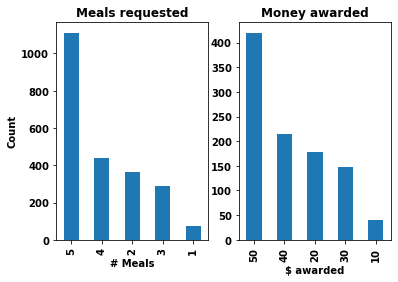

In [49]:

fig, axes = plt.subplots(1, 2)

df_response['meals'].value_counts().plot.bar(ax=axes[0])
df_awarded['amount'].value_counts().plot.bar(ax=axes[1])

axes[0].set_title('Meals requested')
axes[0].set_xlabel("# Meals")
axes[1].set_title('Money awarded')
axes[1].set_xlabel("$ awarded")
axes[0].set_ylabel('Count')


How many duplicated phone numbers are there in each dataset?

Default behavior of duplicated : Mark duplicates as True except for the first occurrence.

In [50]:
df_response['phone_number'].duplicated().value_counts()

True     1584
False     694
Name: phone_number, dtype: int64

In [51]:


df_awarded['phone_number'].duplicated().value_counts()

False    538
True     462
Name: phone_number, dtype: int64

## Per number data

Now we will add up the requested meals and awarded money for each phone number and look at the difference (assuming awarded money = 10*meals). This data is ouput to `per_phone_info.csv`

In [52]:

requested_meals = df_response.groupby('phone_number')['meals'].sum()
requested_meals.name = 'requested_meals'
awarded_meals = df_awarded.groupby('phone_number')['amount'].sum()
awarded_meals.name = 'awarded_money'

df_phone_info = pd.concat([requested_meals, awarded_meals],axis=1)

df_phone_info['difference'] = df_phone_info['awarded_money'] - 10*df_phone_info['requested_meals']
df_phone_info

df_phone_info.to_csv('output/per_phone_info.csv')


Text(0, 0.5, 'Count')

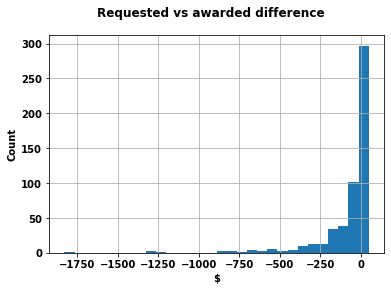

In [53]:
df_phone_info['difference'].hist(bins=30)
plt.suptitle('Requested vs awarded difference')
plt.xlabel("$")
plt.ylabel("Count")

We can also output a table of the data only where the difference is not zero (`per_phone_info_discrepancy.csv`)

In [54]:

discrepancy = df_phone_info.where(df_phone_info['difference'] != 0).dropna()
discrepancy.to_csv('output/per_phone_info_discrepancy.csv')


## Community analysis

Below we calculate the number of responses per community, and the total meals awarded to each community. I wasn't sure how to deal with the multiple responses per community (when someone gives muliple resonses), so those are still just kept as their own community for now. 

Text(0, 0.5, 'Count')

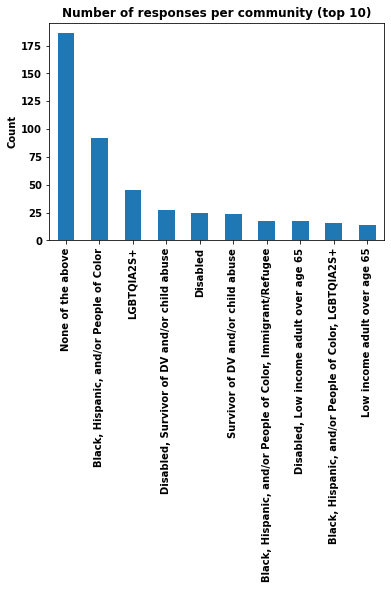

In [55]:

community_counts = df_response['community'].value_counts()
community_counts.name = 'community_counts '
community_counts 

community_counts.sort_values(ascending=False)[0:10].plot.bar()
plt.title('Number of responses per community (top 10)')
plt.ylabel('Count')


Text(0, 0.5, 'Total Meals')

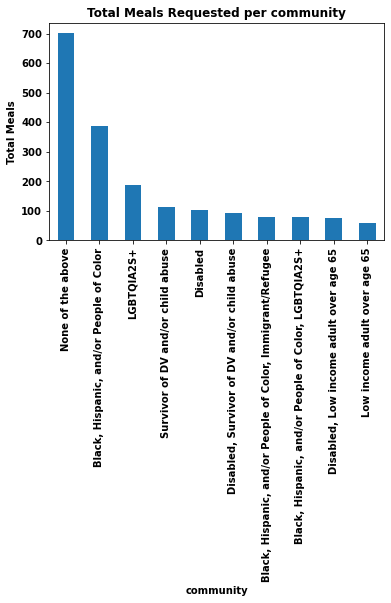

In [56]:


meals_per_community = df_response.groupby('community')['meals'].sum()
meals_per_community.name = 'meals_per_community' 
meals_per_community.sort_values(ascending=False)[0:10].plot.bar()
plt.title('Total Meals Requested per community')

plt.ylabel('Total Meals')

In [67]:
awarded_numbers = df_awarded['phone_number'].unique()
awarded_numbers


latest_responses = df_response.drop_duplicates(subset='phone_number', keep='last').set_index('phone_number')

mutual_numbers = [number for number in awarded_numbers if number in latest_responses.index]

community_awarded_number = latest_responses.loc[mutual_numbers]['community']
# community_awarded_number 

In [64]:
total_awarded_number = df_awarded.groupby('phone_number')['amount'].sum()[mutual_numbers]
# total_awarded_number

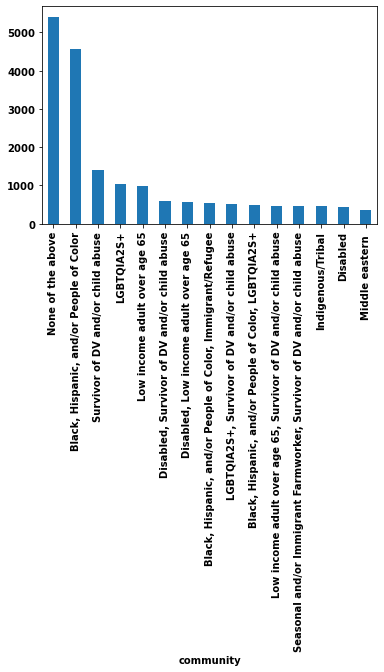

In [59]:
df = pd.concat([community_awarded_number, total_awarded_number],axis=1)
community_money = df.groupby('community')['amount'].sum().sort_values(ascending=False)
community_money[0:15].plot.bar() 

In [60]:
total_money_awarded = total_awarded_number.sum()
print("The total money awarded was {} Dollars".format(total_money_awarded))



The total money awarded was 37690 Dollars


Text(0.5, 1.0, 'percentage of money awarded by community (last response)')

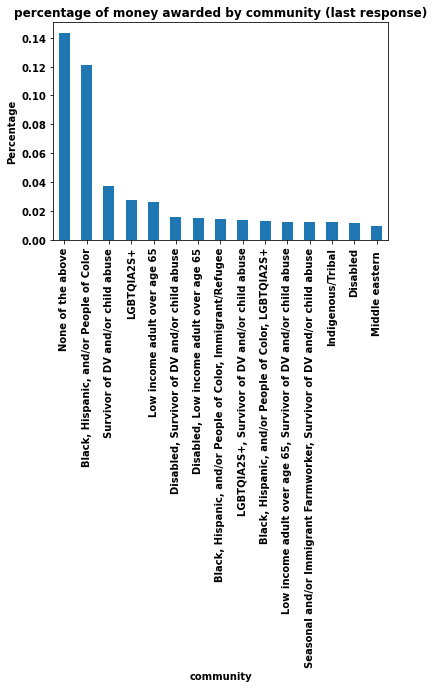

In [61]:

fraction_awarded_community = community_money/total_money_awarded

fraction_awarded_community[0:15].plot.bar()
plt.ylabel('Percentage')
plt.title("percentage of money awarded by community (last response)")

In [62]:
df_community_stats = pd.concat([community_counts, meals_per_community],axis=1)
df_community_stats
df_community_stats.to_csv('output/community_stats.csv')

In [63]:
df_community_stats

,community_counts,meals_per_community
None of the above,186,701
"Black, Hispanic, and/or People of Color",92,389
LGBTQIA2S+,45,187
"Disabled, Survivor of DV and/or child abuse",27,92
Disabled,25,103
...,...,...
"Black, Hispanic, and/or People of Color, Indigenous/Tribal, Seasonal and/or Immigrant Farmworker, LGBTQIA2S+",1,5
"Indigenous/Tribal, None of the above",1,4
"Black, Hispanic, and/or People of Color, Disabled, Low income adult over age 65, Survivor of DV and/or child abuse",1,5
"Black, Hispanic, and/or People of Color, Immigrant/Refugee, Seasonal and/or Immigrant Farmworker, LGBTQIA2S+, Currently houseless",1,5
